In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
import numpy as np
import tensorflow as tf

import strawberryfields as sf
from strawberryfields.ops import *
import pickle
import random as rd
import matplotlib.pyplot as plt
from collections.abc import Callable

from uq_new import quartic_data, get_data, memristor_update_function, multiply_three_inputs, target_function, build_circuit, train_memristor, predict_memristor


tf.get_logger().setLevel('ERROR')
warnings.filterwarnings("ignore")

In [ ]:
print("Memristor time lag")
dip = 3  # Memory depth

# Input data
# inp = np.random.random_sample(100) * 0.5  # Random values between 0 and 0.5
# x_train = tf.constant(np.sqrt(inp), dtype=tf.float32)

X_train, y_train, X_test, y_test, label_noise = get_data(quartic_data)

# Train the memristor model
res_mem, phi1, phi3, x_2 = train_memristor(x_train, dip)

# Save training results
with open("results_mem_t_lag_iris.pkl", "wb") as file:
    pickle.dump(res_mem, file)


Memristor time lag
Training memristor model
Initial parameters: phi1=5.612504005432129, phi3=0.6036221385002136, x_2=0.4277026057243347
Loss at step 1: 130.3537139892578
Loss at step 2: 130.29225158691406
Loss at step 3: 130.230224609375
Loss at step 4: 130.16744995117188
Loss at step 5: 130.10415649414062
Loss at step 6: 130.04014587402344
Loss at step 7: 129.9755401611328
Loss at step 8: 129.91024780273438
Loss at step 9: 129.84426879882812
Loss at step 10: 129.77761840820312
Final loss: 129.77761840820312
Optimal parameters: phi1=5.6425933837890625, phi3=0.5736152529716492, x_2=0.4578082859516144


In [5]:
# Predict using the trained model
x_test = x_train  # For simplicity, using the same data
predictions, targets = predict_memristor(x_test, dip, phi1, phi3, x_2)

# Print predictions and targets
print("Predictions:", predictions)
print("Targets:", targets)


Predictions: [0.4955359, 0.69771206, 0.6978879, 0.8358871, 0.9120917, 0.7308464, 0.80277705, 0.8904914, 0.71707535, 0.5958407, 0.7472607, 0.66854024, 0.90480936, 0.8964451, 0.8672813, 0.90754336, 0.89984936, 0.69203395, 0.9073395, 0.84415936, 0.8977181, 0.90985596, 0.765727, 0.6305485, 0.71458614, 0.8049372, 0.89594483, 0.90436, 0.47212258, 0.8317994, 0.8008915, 0.70889103, 0.63861656, 0.7700723, 0.90763605, 0.7645135, 0.83851594, 0.88251066, 0.78506815, 0.9144802, 0.91387284, 0.73098826, 0.83210844, 0.75588137, 0.7470697, 0.54114985, 0.8569405, 0.8297242, 0.56188023, 0.74254626, 0.90483445, 0.7201987, 0.6590403, 0.82739604, 0.91133, 0.7238215, 0.8757918, 0.891835, 0.72279847, 0.88677806, 0.78636026, 0.8671992, 0.8692304, 0.8447289, 0.61184335, 0.89975125, 0.7637205, 0.68814826, 0.54719347, 0.8519357, 0.8719858, 0.4991337, 0.83309454, 0.712628, 0.8647186, 0.68208474, 0.8775885, 0.7934115, 0.91012776, 0.6548077, 0.7729708, 0.63162744, 0.90500575, 0.90379506, 0.73254466, 0.87376404, 0.89

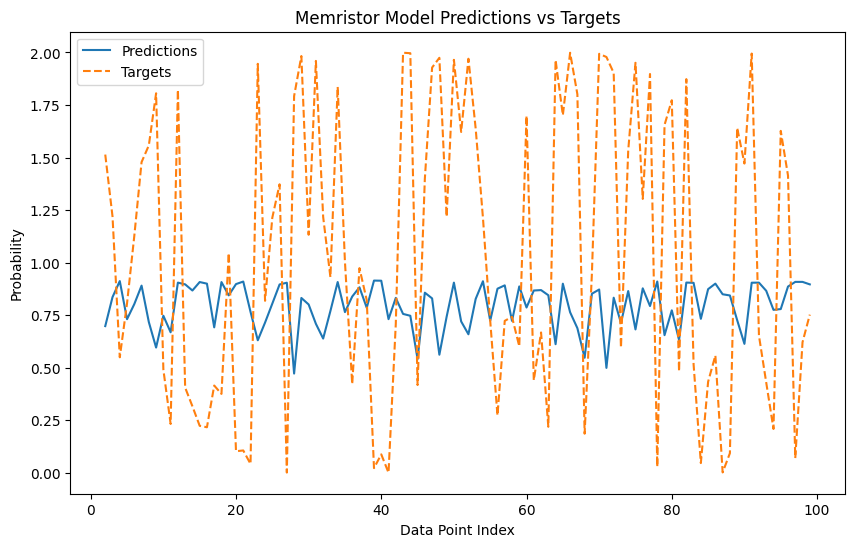

In [6]:
# Plotting
# Since targets and predictions start from index 2 (after phi >= 2), we adjust the x-axis accordingly
x_axis = np.arange(2, len(predictions))
plt.figure(figsize=(10, 6))
plt.plot(x_axis, predictions[2:], label='Predictions')
plt.plot(x_axis, targets, label='Targets', linestyle='--')
plt.xlabel('Data Point Index')
plt.ylabel('Probability')
plt.title('Memristor Model Predictions vs Targets')
plt.legend()
plt.show()
